# Linear Regression for Asset Pricing
## Project 2: APT (Arbitrage Price Theory)
### Milestone 4: Comparing APT and CAPM

In [3]:
import pandas as pd          ## Data engine
import numpy as np

import statsmodels.api as sm ## Model

import seaborn as sns        ## Visualization
from matplotlib import pyplot as plt

### Define functions to help us

In [2]:
### Reminder - CAPM is two lines of code
# CAPM_AAPL = sm.OLS(y_aapl, X_tech)
# CAPM_results_AAPL = CAPM_AAPL.fit()

In [3]:
def apt_output(df, asset, factors, market):
    '''
    asset = stock, etc
    factors = predictors used in regression
    returns loadings (factor Betas), mean return and the market beta
    '''
    X = sm.add_constant(df[factors])  # Add intercept
    y = df[asset]
    model = sm.OLS(y, X)
    model_out = model.fit()
    
    # Extract factor loadings only (no constant)
    loadings = [model_out.params.loc[factor] for factor in factors]
    beta_market = model_out.params.loc[factors[0]]

    # Actual mean excess return
    mean_return = y.mean()
    
    # Market beta 
    beta_market = model_out.params.loc[market]

    # alpha
    alpha_term = model_out.params.loc['const']
    
    return loadings, mean_return, beta_market, alpha_term

### SML

In [4]:
def SML(rf, rm, betas, beta_names, use_actual=False, actual_ret=[0,0,0,0]):
    '''
    params:
        rf: risk-free rate, mean value
        ret: market return rate, mean
        betas: output of the CAPM fit, beta coefficient, as python list
        beta_names: for labels only, a list same length as betas
        use_actual: False if use CAPM to plot stock points, True if pass actual returns
        actual_ret: a list of returns, same length as betas and beta_names
    '''
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret, label='SML')
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    
    # Determine if the asset is underpriced or overpriced
    if use_actual:
        asset_ret = actual_ret
    
    for beta, return_value, beta_name in zip(betas, asset_ret, beta_names):
        
        # Plot each point
        if return_value > rm:
            plt.plot(beta, return_value, 'go')
            plt.text(beta, return_value, '%s - Underpriced' %beta_name, fontsize=9, color='green')
        elif return_value < rm:
            plt.plot(beta, return_value, 'ro')
            plt.text(beta, return_value, '%s - Overpriced' %beta_name, fontsize=9, color='red')

    # plt.plot(1, ret, "ro", label='Asset Return')
    plt.legend()
    plt.grid()
    plt.show()

### SML - for CAPM

In [ ]:
def SML(rf, rm, betas, beta_names, use_actual=False, actual_ret=[0,0,0,0]):
    '''
    params:
        rf: risk-free rate, mean value
        ret: market return rate, mean
        betas: output of the CAPM fit, beta coefficient, as python list
        beta_names: for labels only, a list same length as betas
        use_actual: False if use CAPM to plot stock points, True if pass actual returns
        actual_ret: a list of returns, same length as betas and beta_names
    '''
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret, label='SML')
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")

### SML - for CAPM

In [ ]:
    # Determine if the asset is underpriced or overpriced
    if use_actual:
        asset_ret = actual_ret
    
    for beta, return_value, beta_name in zip(betas, asset_ret, beta_names):
        
        # Plot each point
        if return_value > rm:
            plt.plot(beta, return_value, 'go')
            plt.text(beta, return_value, '%s - Underpriced' %beta_name
                     , fontsize=9, color='green')
        elif return_value < rm:
            plt.plot(beta, return_value, 'ro')
            plt.text(beta, return_value, '%s - Overpriced' %beta_name
                     , fontsize=9, color='red')

    plt.legend()
    plt.grid()
    plt.show()

# Data set #1 - Recent data

<b>Tickers</b>: semiconductor/AI + S&P500\
<b>Period</b>: 2 most recent years\
<b>Periodicity</b>: Monthly

In [4]:
### Restore our prior data set
scen1_inputs = pd.read_csv('p2m2_scen1_returns.csv')\
                .set_index('fiscal_end')

### Keep only excess returns for model
keepers1 = [c for c in scen1_inputs.columns if c.startswith('excess')]
scen1_inputs = scen1_inputs[keepers1]
scen1_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2023-02-28 to 2024-11-30
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   excess_return_AMD                  22 non-null     float64
 1   excess_return_INTC                 22 non-null     float64
 2   excess_return_MSFT                 22 non-null     float64
 3   excess_return_NVDA                 22 non-null     float64
 4   excess_return_SPY                  22 non-null     float64
 5   excess_return_potential_inflation  22 non-null     float64
 6   excess_return_industrial_prod      22 non-null     float64
 7   excess_return_risk_free            22 non-null     float64
dtypes: float64(8)
memory usage: 1.5+ KB


In [5]:
scen1_inputs[['excess_return_AMD','excess_return_INTC','excess_return_SPY'
              ,'excess_return_potential_inflation','excess_return_risk_free']].head()

,excess_return_AMD,excess_return_INTC,excess_return_SPY,excess_return_potential_inflation,excess_return_risk_free
fiscal_end,,,,,
2023-02-28,-0.005531,-0.169007,-0.076315,-0.045093,0.0
2023-03-31,0.297974,0.361179,0.083845,0.053635,0.0
2023-04-30,-0.088154,-0.049281,0.015975,0.004296,0.0
2023-05-31,0.273558,-0.036911,-0.044529,-0.046735,0.0
2023-06-30,-0.103586,-0.003597,-0.006351,-0.063798,0.0


In [7]:
### Need to restore risk-free rate
scen1_fred = pd.read_csv('scen1_fred.csv').drop('Unnamed: 0', axis=1)\
            .set_index('month')
scen1_fred.head(2)

,potential_inflation,industrial_prod,risk_free
month,,,
2023-01-31,325.520,102.7476,4.69
2023-02-28,327.499,102.8003,4.93


In [8]:
### Join
scen1_presml = scen1_inputs.drop('excess_return_risk_free',axis=1)\
                           .merge(scen1_fred['risk_free']
                                  ,left_on='fiscal_end'
                                  ,right_on='month'
                                  ,how='inner')
scen1_presml.head()

,excess_return_AMD,excess_return_INTC,excess_return_MSFT,excess_return_NVDA,excess_return_SPY,excess_return_potential_inflation,excess_return_industrial_prod,risk_free
0,-0.005531,-0.169007,-0.044676,0.137137,-0.076315,-0.045093,-0.050660,4.93
1,0.297974,0.361179,0.206592,0.247169,0.083845,0.053635,0.050846,4.68
2,-0.088154,-0.049281,0.065765,-0.001008,0.015975,0.004296,0.003986,4.68
3,0.273558,-0.036911,0.019624,0.314291,-0.044529,-0.046735,-0.051501,4.91
4,-0.103586,-0.003597,-0.030211,0.050885,-0.006351,-0.063798,-0.073036,5.24


### Data Set #1 - CAPM

In [10]:
### Generate CAPM
X_tech = sm.add_constant(scen1_presml['excess_return_SPY'], prepend=False)
tech_names = ['AMD','INTC','MSFT','NVDA']
tech_betas = []
tech_alphas = []
for i in tech_names:
    CAPM_ = sm.OLS(scen1_presml['excess_return_%s' %i], X_tech)
    CAPM_results_ = CAPM_.fit()
    tech_betas.append(CAPM_results_.params.loc['excess_return_SPY'])
    tech_alphas.append(CAPM_results_.params.loc['const'])
    print("Market Beta for %s: %.3f" %(i, CAPM_results_.params.loc['excess_return_SPY']))

Market Beta for AMD: 1.510
Market Beta for INTC: 1.453
Market Beta for MSFT: 1.010
Market Beta for NVDA: 0.736


### Data set #1 - APT

In [12]:
### X vars for APT
X_apt_scen1 = ['excess_return_SPY'
         , 'excess_return_potential_inflation'
         , 'excess_return_industrial_prod']

In [13]:
### Run APT models
tech_market = 'excess_return_SPY'
APT_results_AMD = 
    apt_output(scen1_presml, 'excess_return_AMD', X_apt_scen1, tech_market)
APT_results_MSFT = 
    apt_output(scen1_presml, 'excess_return_MSFT', X_apt_scen1, tech_market)
APT_results_INTC = 
    apt_output(scen1_presml, 'excess_return_INTC', X_apt_scen1, tech_market)
APT_results_NVDA = 
    apt_output(scen1_presml, 'excess_return_NVDA', X_apt_scen1, tech_market)

In [14]:
tech_names = ['AMD','INTC','MSFT','NVDA']
res_dict = {'AMD':APT_results_AMD, 'MSFT':APT_results_MSFT,
            'INTC':APT_results_INTC,'NVDA':APT_results_NVDA}
tech_cdtl_betas = []
tech_cdtl_alphas = []
for tn in tech_names:
    tech_cdtl_betas.append(res_dict[tn][2])
    tech_cdtl_alphas.append(res_dict[tn][3])
    print("Conditional Market Beta for %s: %.3f" %(tn, res_dict[tn][2]))
# APT_results_AMD[2]

Conditional Market Beta for AMD: 1.322
Conditional Market Beta for INTC: 2.244
Conditional Market Beta for MSFT: 0.917
Conditional Market Beta for NVDA: 1.680


In [24]:
### Compare alphas and betas
_tb = zip(tech_betas, tech_cdtl_betas, tech_alphas, tech_cdtl_alphas)
apt_labels=['CAPM Beta','APT Condl Beta','CAPM Alpha','APT Alpha']
_tb_df = pd.DataFrame(_tb, columns = apt_labels, index=tech_names)
_tb_df.head()

,CAPM Beta,APT Condl Beta,CAPM Alpha,APT Alpha
AMD,1.509835,1.322440,0.005810,0.008287
INTC,1.453234,2.244379,-0.025738,-0.039239
MSFT,1.010363,0.917059,0.007390,0.007019
NVDA,0.735891,1.680226,0.086629,0.069316


### Security Market lines

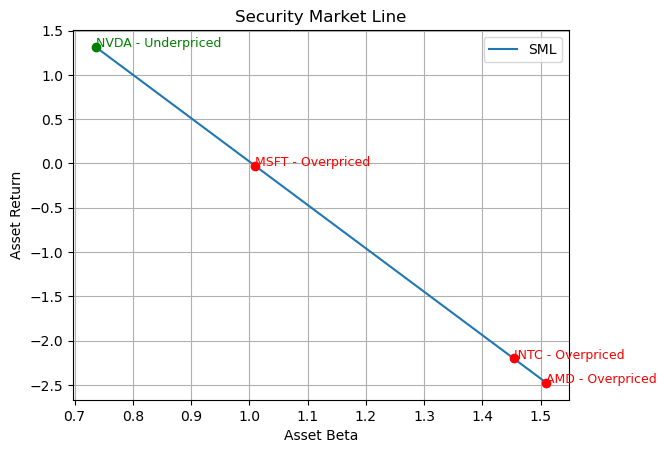

In [18]:
## Generate SML for CAPM
rm_tech = X_tech.mean().iloc[0] 
rf_mean_tech = scen1_presml['risk_free'].mean()
SML(rf=rf_mean_tech, rm=rm_tech
    , betas=tech_betas, beta_names=tech_names)

### Conditional Security Market Line

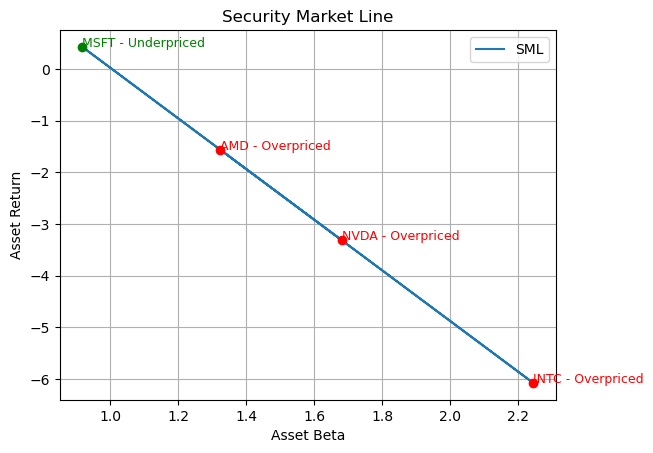

In [20]:
## Generate conditional SML for APT
rm_tech = X_tech.mean().iloc[0] 
rf_mean_tech = scen1_presml['risk_free'].mean()
SML(rf=rf_mean_tech, rm=rm_tech
    , betas=tech_cdtl_betas, beta_names=tech_names)